<a href="https://colab.research.google.com/github/adivafiqri/Machine-Learning/blob/main/kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adiva Fiqri Nugraha
##1918101472

#1) Inisialisasi

In [ ]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm 
from nltk.tokenize import TweetTokenizer
     


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
!pip install scikit-multilearn

#2) Pre-Processing

In [ ]:
import pandas as pd

df = pd.read_csv('/content/data.csv', encoding='latin-1', sep=',')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
df.dropna(inplace=True)
df.isna().any()

Tweet            False
HS               False
Abusive          False
HS_Individual    False
HS_Group         False
HS_Religion      False
HS_Race          False
HS_Physical      False
HS_Gender        False
HS_Other         False
HS_Weak          False
HS_Moderate      False
HS_Strong        False
dtype: bool

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# punkt
# stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords #wordnet 

stop_words = set(stopwords.words("indonesian")) 
lemmatizer = WordNetLemmatizer()

## - Mengubah dataset menjadi huruf kecil

In [ ]:
#mengubah dataset menjadi huruf kecil
df['Tweet'] = df['Tweet'].str.lower()
print(df['Tweet'].head(10))


0    - disaat semua cowok berusaha melacak perhatia...
1    rt user: user siapa yang telat ngasih tau elu?...
2    41. kadang aku berfikir, kenapa aku tetap perc...
3    user user aku itu aku\n\nku tau matamu sipit t...
4    user user kaum cebong kapir udah keliatan dong...
5    user ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...
6    deklarasi pilkada 2018 aman dan anti hoax warg...
7    gue baru aja kelar re-watch aldnoah zero!!! pa...
8    nah admin belanja satu lagi port terbaik nak m...
9                        user enak lg klo smbil ngewe'
Name: Tweet, dtype: object


## - Remove Simbol

In [ ]:
import string 
import re 

from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist


def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    text = text.replace('user'," ").replace('rt'," ")
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

                
df['Tweet1'] = df['Tweet'].apply(remove_tweet_special)


## Remove Angka

In [ ]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['Tweet1'] = df['Tweet1'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['Tweet1'] = df['Tweet1'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Tweet1'] = df['Tweet1'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['Tweet1'] = df['Tweet1'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Tweet1'] = df['Tweet1'].apply(remove_singl_char)



##TOKENIZE (normalized + tokenize)

In [ ]:
# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['Tweet2'] = df['Tweet1'].apply(word_tokenize_wrapper)

print(df['Tweet2'].head())


0    [disaat, semua, cowok, berusaha, melacak, perh...
1    [siapa, yang, telat, ngasih, tau, eluedan, sar...
2    [kadang, aku, berfikir, kenapa, aku, tetap, pe...
3    [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...
4    [kaum, cebong, kapir, udah, keliatan, dongokny...
Name: Tweet2, dtype: object


## Normalized kamus alay

In [ ]:
normalizad_word = pd.read_excel("/content/new_kamusalay.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Tweet2'] = df['Tweet2'].apply(normalized_term)

df['Tweet2'].head(10)

0    [di saat, semua, cowok, berusaha, melacak, per...
1    [siapa, yang, telat, memberi, tau, eluedan, sa...
2    [kadang, aku, berpikir, kenapa, aku, tetap, pe...
3    [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...
4    [kaum, cebong, kafir, sudah, kelihatan, dongok...
5    [ya, bani, taplak, dan kawan kawan, xfxfxxxfxf...
6    [deklarasi, pilihan kepala daerah, aman, dan, ...
7    [gue, baru, saja, selesai, rewatch, aldnoah, z...
8    [nah, admin, belanja, satu, lagi, po, terbaik,...
9                   [enak, lagi, kalau, sambil, ngewe]
Name: Tweet2, dtype: object

## Stop words

In [ ]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
#txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
#list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['Tweet3'] = df['Tweet2'].apply(stopwords_removal) 


print(df['Tweet3'].head(10))

0    [di saat, cowok, berusaha, melacak, perhatian,...
1    [telat, eluedan, sarap, gue, bergaul, cigax, j...
2    [kadang, berpikir, percaya, tuhan, jatuh, berk...
3                                  [ku, matamu, sipit]
4        [kaum, cebong, kafir, dongoknya, dungu, haha]
5    [bani, taplak, dan kawan kawan, xfxfxxxfxfxxxf...
6    [deklarasi, pilihan kepala daerah, aman, anti,...
7    [gue, selesai, rewatch, aldnoah, zero, kampret...
8    [admin, belanja, po, terbaik, nak, makan, ais,...
9                                        [enak, ngewe]
Name: Tweet3, dtype: object


In [ ]:
pip install Sastrawi


     |████████████████████████████████| 209 kB 4.2 MB/s 


In [ ]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('indonesian'))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
# stop_words = set(stopwords.words('indonesian'))
def clean_text(text):
    # text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text
df['Tweet4'] = df['Tweet3'].apply(lambda x: clean_text(x)) 

In [ ]:
df['Tweet4']

0        di saat cowok berusaha melacak perhatian gue l...
1        telat eluedan sarap gue bergaul cigax jifla ca...
2        kadang berpikir percaya tuhan jatuh berkalikal...
3                                          ku matamu sipit
4                   kaum cebong kafir dongoknya dungu haha
                               ...                        
13164                berbicara ndasmu congor sekate anjing
13165                                    kasur enak kunyuk
13166                    hati hati bisu bosan duh xfxfxxaa
13167    bom real mudah terdeteksi bom terkubur dahsyat...
13168                                 situ foto kutil onta
Name: Tweet4, Length: 13169, dtype: object

In [ ]:
# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['Tweet5'] = df['Tweet4'].apply(word_tokenize_wrapper)

print(df['Tweet5'].head())

0    [di, saat, cowok, berusaha, melacak, perhatian...
1    [telat, eluedan, sarap, gue, bergaul, cigax, j...
2    [kadang, berpikir, percaya, tuhan, jatuh, berk...
3                                  [ku, matamu, sipit]
4        [kaum, cebong, kafir, dongoknya, dungu, haha]
Name: Tweet5, dtype: object


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['Tweet5']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['Tweet6'] = df['Tweet5'].apply(get_stemmed_term)


Streaming output truncated to the last 5000 lines.
ikigusti : ikigusti
xexxcmas : xexxcmas
monyetxexxd : monyetxexxd
menjulurkan : julur
metropolis : metropolis
nasabah : nasabah
tadwin : tadwin
omelin : omelin
udhorg : udhorg
taruhan : taruh
xfxfxxbxfxfxxbxfxfxxbxfxfxxbxfxfxx : xfxfxxbxfxfxxbxfxfxxbxfxfxxbxfxfxx
plagiat : plagiat
rest : rest
move : move
kekuasaankasak : kekuasaankasak
kusuk : kusuk
mampupadahal : mampupadahal
banglanjutkanbiar : banglanjutkanbiar
kampretbani : kampretbani
semuaxfxfxxxfxfxxxfxfxxxfxfxx : semuaxfxfxxxfxfxxxfxfxxxfxfxx
manusiatapi : manusiatapi
infrastrukturnya : infrastruktur
diraih : raih
bencana : bencana
adanya : ada
terinjak : injak
mengarang : arang
terduduk : duduk
bajinganxfxfxx : bajinganxfxfxx
bujangan : bujang
luxfxfxxac : luxfxfxxac
temenxfxfxxadxfxfxaxa : temenxfxfxxadxfxfxaxa
hahahahatimnasnya : hahahahatimnasnya
laennmalu : laennmalu
maludiem : maludiem
corengan : coreng
sungjin : sungjin
menghamili : hamil
barbie : barbie
tausiah : tausia

**Menghapus null**

In [ ]:
filter = df["Tweet6"] != ""
df = df[filter]
df = df.dropna()

In [ ]:
df['Tweet6'] = df['Tweet6'].apply(lambda x: clean_text(x)) 

In [ ]:
df['Tweet6'].head()

0    di saat cowok usaha lacak perhati gue lantas r...
1    telat eluedan sarap gue gaul cigax jifla cal l...
2    kadang pikir percaya tuhan jatuh berkalikali k...
3                                        ku mata sipit
4                  kaum cebong kafir dongok dungu haha
Name: Tweet6, dtype: object

##Labeling

In [ ]:
df_labels = df[["HS", "Abusive", "HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong"]]
df_labels.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,1,1,1,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,1,0


**Melihat jumlah label**

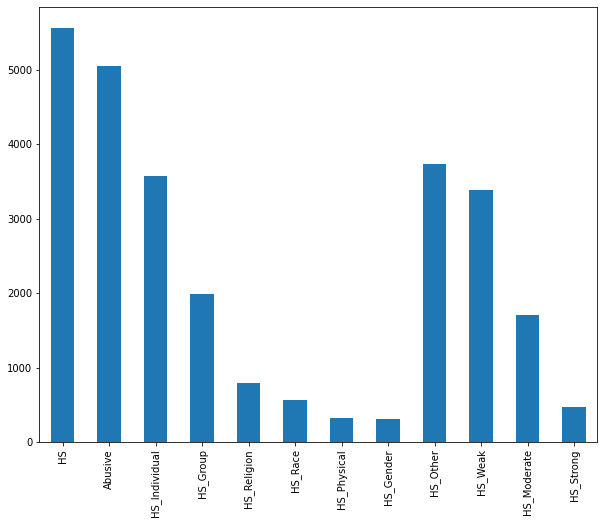

In [ ]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_labels.sum(axis=0).plot.bar()

##**3) Feature Extraction**

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
corpus = df['Tweet4']

In [ ]:
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [ ]:
Xfeatures

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df_labels

##Dataset split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

# 4) Membuat model

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

In [ ]:
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [ ]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

##Testing model

In [ ]:
br_prediction = binary_rel_clf.predict(X_test)

In [ ]:
br_prediction.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

##Akurasi skor

In [ ]:
accuracy_score(y_test,br_prediction)

0.4912680334092635

##Hamming loss

In [ ]:
hamming_loss(y_test,br_prediction)

0.12325993419387497

##Klasifikasi


In [ ]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    clf_predictions = clf.predict(xtest)
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [ ]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [ ]:
clf_chain_model

{'accuracy:': 0.5565679574791192, 'hamming_score': 0.11225006327512023}

**Label powerset teknik**

In [ ]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)

In [ ]:
clf_labelP_model

{'accuracy:': 0.5158187800556822, 'hamming_score': 0.15612081329621194}

## Single prediction

In [ ]:
ex1 = 'Aku sangat baik tapi boong'

In [ ]:
vec_example = tfidf.transform([ex1])

In [ ]:
binary_rel_clf.predict(vec_example).toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)